Num GPUs Available:  0


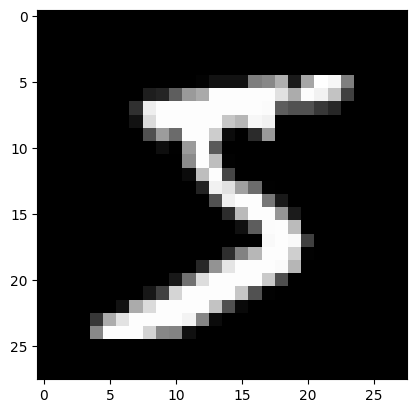

Taille de l'image : (28, 28)


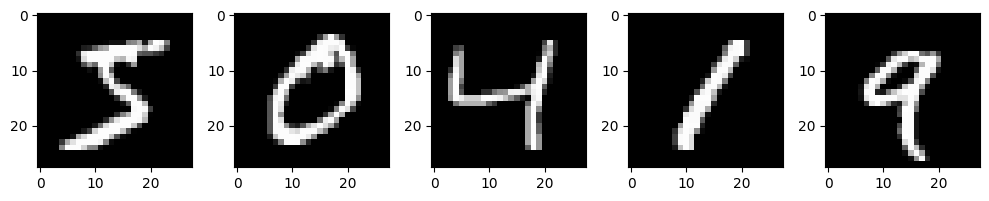

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image
import matplotlib.pyplot as plt

# Vérifier si TensorFlow détecte la carte graphique
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Chargement du dataset MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Affichage de l'image de l'index 0
image = Image.fromarray(X.iloc[0].values.reshape(28, 28).astype(np.uint8))  # Convertir le type de données en uint8
plt.imshow(image, cmap='gray')
plt.show()

# Taille de l'image
print(f"Taille de l'image : {image.size}")

# Afficher 5 premières images dans une seule figure
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for i in range(5):
    image = Image.fromarray(X.iloc[i].values.reshape(28, 28).astype(np.uint8))
    axes[i].imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

# Prétraitement des données
X = X / 255.0  # Normaliser les pixels entre 0 et 1
X = X.values.reshape(-1, 28, 28, 1)  # Reshaper les données pour qu'elles aient 1 canal (grayscale)

# Diviser les données en ensembles de train et test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les labels en entiers
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)


In [ ]:


# Création du modèle avec TensorFlow (Keras)
model = models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Précision sur le jeu de test : {test_acc:.4f}")

# Prédictions sur le jeu de test
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcul de l'accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (accuracy_score) : {acc:.4f}")

IndentationError: unexpected indent (3524133466.py, line 2)